# Preprocessing ADNI data

## 1st part - Dividing in train/val sets, and correct for confounds

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as smf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

demo_cols = ['diagnosis', 'age', 'gender', 'eTIV']

features_cort = ['thickness_bankssts_lh', 'thickness_caudalanteriorcingulate_lh', 'thickness_caudalmiddlefrontal_lh',  'thickness_cuneus_lh',  'thickness_entorhinal_lh',  'thickness_fusiform_lh',  'thickness_inferiorparietal_lh',  'thickness_inferiortemporal_lh',  'thickness_isthmuscingulate_lh',  'thickness_lateraloccipital_lh',  'thickness_lateralorbitofrontal_lh',  'thickness_lingual_lh',  'thickness_medialorbitofrontal_lh',  'thickness_middletemporal_lh',  'thickness_parahippocampal_lh',  'thickness_paracentral_lh',  'thickness_parsopercularis_lh',  'thickness_parsorbitalis_lh',  'thickness_parstriangularis_lh',  'thickness_pericalcarine_lh',  'thickness_postcentral_lh',  'thickness_posteriorcingulate_lh',  'thickness_precentral_lh',  'thickness_precuneus_lh',  'thickness_rostralanteriorcingulate_lh', 'thickness_rostralmiddlefrontal_lh',  'thickness_superiorfrontal_lh',  'thickness_superiorparietal_lh',  'thickness_superiortemporal_lh',  'thickness_supramarginal_lh',  'thickness_frontalpole_lh',  'thickness_temporalpole_lh',  'thickness_transversetemporal_lh',  'thickness_insula_lh',  'thickness_bankssts_rh',  'thickness_caudalanteriorcingulate_rh', 'thickness_caudalmiddlefrontal_rh',  'thickness_cuneus_rh',  'thickness_entorhinal_rh',  'thickness_fusiform_rh',  'thickness_inferiorparietal_rh',  'thickness_inferiortemporal_rh',  'thickness_isthmuscingulate_rh',  'thickness_lateraloccipital_rh',  'thickness_lateralorbitofrontal_rh',  'thickness_lingual_rh',  'thickness_medialorbitofrontal_rh',  'thickness_middletemporal_rh',  'thickness_parahippocampal_rh',  'thickness_paracentral_rh',  'thickness_parsopercularis_rh',  'thickness_parsorbitalis_rh',  'thickness_parstriangularis_rh',  'thickness_pericalcarine_rh',  'thickness_postcentral_rh',  'thickness_posteriorcingulate_rh',  'thickness_precentral_rh',  'thickness_precuneus_rh',  'thickness_rostralanteriorcingulate_rh', 'thickness_rostralmiddlefrontal_rh',  'thickness_superiorfrontal_rh',  'thickness_superiorparietal_rh',  'thickness_superiortemporal_rh',  'thickness_supramarginal_rh',  'thickness_frontalpole_rh',  'thickness_temporalpole_rh',  'thickness_transversetemporal_rh',  'thickness_insula_rh']

features_vol = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh', 'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh', 'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh', 'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh', 'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh', 'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh', 'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh', 'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh', 'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh', 'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh', 'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh', 'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh', 'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh', 'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh', 'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh', 'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh', 'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh', 'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh', 'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh', 'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh', 'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh', 'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

features_vol_extra = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                      'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                      'volume_Left-Pallidum','volume_Brain-Stem', 'volume_Left-Hippocampus', 
                      'volume_Left-Amygdala', 'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                      'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                      'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus', 
                      'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [3]:
df_adni = pd.read_csv('raw_collated_freesurfer.csv', sep='\t', index_col=0)
print('Before:', df_adni.shape)

# Removing unnecessary volume columns like ventricles, hypointensities, CC_, and others
df_adni = df_adni.loc[:, demo_cols + features_cort + features_vol + features_vol_extra]

print('After', df_adni.shape)

Before: (736, 185)
After (736, 159)


thickness_bankssts_lh                    2.262758
thickness_caudalanteriorcingulate_lh     2.582876
thickness_caudalmiddlefrontal_lh         2.323939
thickness_cuneus_lh                      1.755315
thickness_entorhinal_lh                  3.073312
thickness_fusiform_lh                    2.546693
thickness_inferiorparietal_lh            2.180386
thickness_inferiortemporal_lh            2.603690
thickness_isthmuscingulate_lh            2.170213
thickness_lateraloccipital_lh            2.010641
thickness_lateralorbitofrontal_lh        2.503264
thickness_lingual_lh                     1.885382
thickness_medialorbitofrontal_lh         2.287685
thickness_middletemporal_lh              2.595273
thickness_parahippocampal_lh             2.584182
thickness_paracentral_lh                 2.208306
thickness_parsopercularis_lh             2.375736
thickness_parsorbitalis_lh               2.513425
thickness_parstriangularis_lh            2.244774
thickness_pericalcarine_lh               1.513260


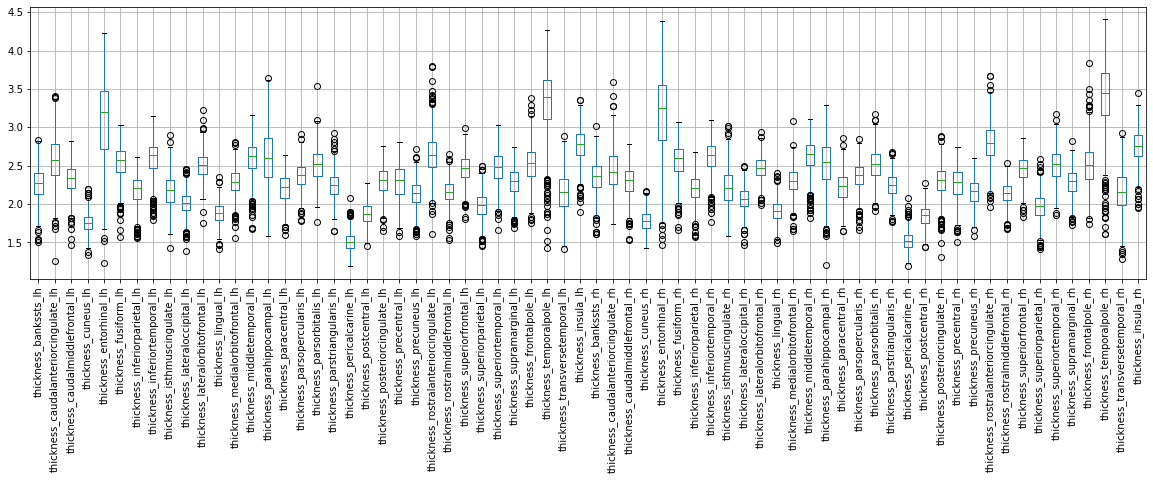

volume_bankssts_lh                     1966.459239
volume_caudalanteriorcingulate_lh      1515.998641
volume_caudalmiddlefrontal_lh          5239.672554
volume_cuneus_lh                       2640.580163
volume_entorhinal_lh                   1868.811141
volume_fusiform_lh                     8409.775815
volume_inferiorparietal_lh             9534.595109
volume_inferiortemporal_lh             9487.805707
volume_isthmuscingulate_lh             2268.732337
volume_lateraloccipital_lh            10309.402174
volume_lateralorbitofrontal_lh         6697.688859
volume_lingual_lh                      5715.865489
volume_medialorbitofrontal_lh          4642.277174
volume_middletemporal_lh               9050.273098
volume_parahippocampal_lh              1863.192935
volume_paracentral_lh                  3098.619565
volume_parsopercularis_lh              3885.014946
volume_parsorbitalis_lh                2038.138587
volume_parstriangularis_lh             3051.573370
volume_pericalcarine_lh        

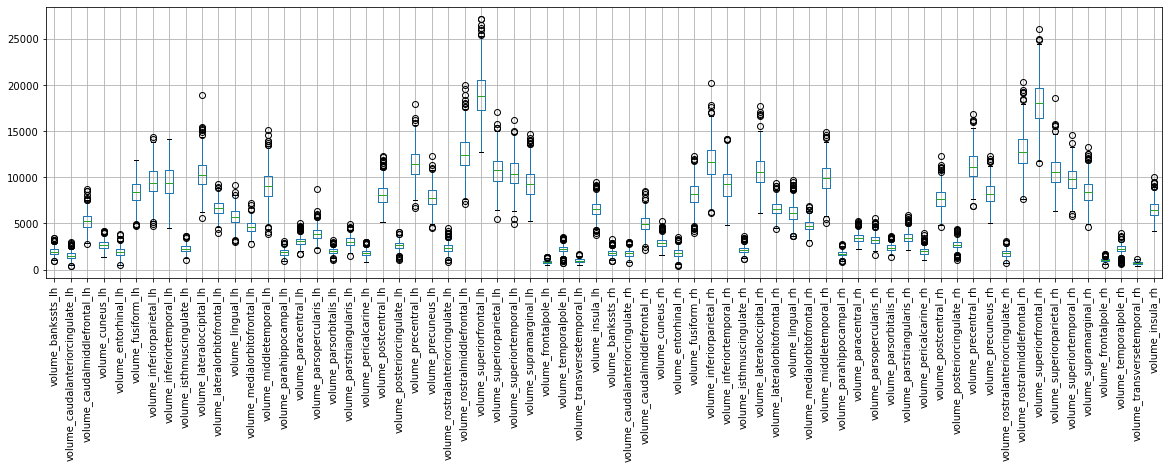

volume_Left-Cerebellum-White-Matter     12992.383696
volume_Left-Cerebellum-Cortex           50708.915082
volume_Left-Thalamus-Proper              6290.469837
volume_Left-Caudate                      3271.206658
volume_Left-Putamen                      4049.634511
volume_Left-Pallidum                     1831.927038
volume_Brain-Stem                       20598.577038
volume_Left-Hippocampus                  3310.652582
volume_Left-Amygdala                     1192.511141
volume_Left-Accumbens-area                380.200000
volume_Right-Cerebellum-White-Matter    12605.911413
volume_Right-Cerebellum-Cortex          50956.966848
volume_Right-Thalamus-Proper             6122.101223
volume_Right-Caudate                     3370.344565
volume_Right-Putamen                     4104.505163
volume_Right-Pallidum                    1790.712772
volume_Right-Hippocampus                 3422.261549
volume_Right-Amygdala                    1375.343750
volume_Right-Accumbens-area               407.

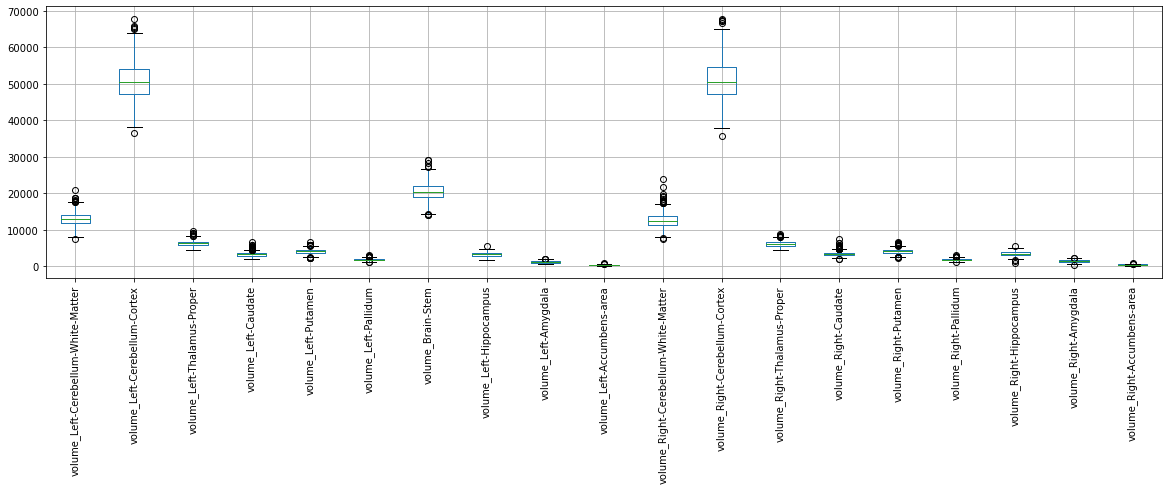

In [6]:
# print all output without truncating
pd.options.display.max_rows = 4000

for feats in [features_cort, features_vol, features_vol_extra]:
    tmp_df = df_adni.loc[:, feats]
    
    # print mean and sd for each region
    print(tmp_df.apply(np.mean, 0))
    print(tmp_df.apply(np.std, 0))
    
    plt.figure(figsize=(20, 5))
    tmp_df.boxplot(rot=90)

    plt.show()
    plt.close()

In [3]:
# Getting all the demographic values to stratitfy dataset according to them
confounds = {'diagnosis' : [], 'age' : [], 'gender' : [], 'eTIV' : []}
             
for i in range(df_adni.shape[0]):
    for confound in confounds.keys():
        confounds[confound].append(df_adni.at[df_adni.index[i], confound])
        
# Making age and eTIV bucketised each in 5 blocks
confounds['age'] = pd.qcut(confounds['age'], 5, labels=False)
confounds['eTIV'] = pd.qcut(confounds['eTIV'], 5, labels=False)

In [4]:
# Joining all the demographic values in str-format labels, and then use LabelEncoder() to change to int-format labels
joined_labels = [f'{confounds["diagnosis"][i]}{confounds["age"][i]}{confounds["gender"][i]}{confounds["eTIV"][i]}' for i in range(df_adni.shape[0])]

strat_labels = LabelEncoder().fit_transform(joined_labels)

# ~10% test set
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1111)
skf_generator = skf.split(np.zeros((df_adni.shape[0], 1)), strat_labels)

for train_index, test_index in skf_generator:
    print(len(train_index), len(test_index))
    break

662 74


/local/sdc/tmla2/miniconda/envs/adni_tim/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [5]:
# Quickly check distribution of all the "joined" labels
np.unique(strat_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 array([15, 12,  7,  3,  1,  4,  6,  9, 21, 15,  4,  8,  3,  1,  2,  5,  3,
        11,  7,  5,  7,  4,  1,  3,  4,  5,  6, 11, 11, 10,  4,  4,  1,  5,
         6, 11, 14, 14,  7,  5,  2,  4,  8, 11, 17, 14, 15, 14,  8,  3,  2,
         4,  2,  3, 11,  9, 16, 14, 12,  6,  2,  2,  7, 15, 16,  7, 14, 12,
        12,  6,  3,  2,  2,  7, 17, 16, 15, 17,  7,  2,  1,  3, 10, 11, 16,
         7,  9,  4,  2,  3,  6,  5, 13, 15]))

In [6]:
# Slicing the original raw df
df_train = df_adni.iloc[train_index, :].copy()
df_test = df_adni.iloc[test_index, :].copy()

In [7]:
def populate_residuals(indep_vars, data, columns, name_regress):
    for c in columns:
        mod = smf.OLS.from_formula(formula= f'Q("{c}") ~ {indep_vars}', data=data)
        model = mod.fit()

        data.loc[:, c] = model.resid
        
        model.save(f'../regress_models/{name_regress}_{c}.pkl')
        
def calculate_residuals(data, columns, name_regress):
    for c in columns:
        lin_model = smf.load(f'../regress_models/{name_regress}_{c}.pkl')
        
        data[c] = data[c] - lin_model.predict(data)

In [8]:
# Calculate residuals from train data (fit curve and save model)
populate_residuals(indep_vars='age', data=df_train, columns=features_cort, name_regress='adni')
populate_residuals(indep_vars='age + eTIV + C(gender)', data=df_train, columns=features_vol+features_vol_extra, name_regress='adni')

# Calculate residuals for test data (load model and calculate from previously fitted curve)
calculate_residuals(data=df_test, columns=features_cort, name_regress='adni')
calculate_residuals(data=df_test, columns=features_vol+features_vol_extra, name_regress='adni')


In [9]:
# Saving corrected data
df_train.to_csv('adni_train_corrected.csv')
df_test.to_csv('adni_test_corrected.csv')

## 2nd part - Normalise data

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import joblib 

demo_cols = ['diagnosis', 'age', 'gender', 'eTIV']

features_cort = ['thickness_bankssts_lh',  'thickness_caudalanteriorcingulate_lh', 'thickness_caudalmiddlefrontal_lh',  'thickness_cuneus_lh',  'thickness_entorhinal_lh',  'thickness_fusiform_lh',  'thickness_inferiorparietal_lh',  'thickness_inferiortemporal_lh',  'thickness_isthmuscingulate_lh',  'thickness_lateraloccipital_lh',  'thickness_lateralorbitofrontal_lh',  'thickness_lingual_lh',  'thickness_medialorbitofrontal_lh',  'thickness_middletemporal_lh',  'thickness_parahippocampal_lh',  'thickness_paracentral_lh',  'thickness_parsopercularis_lh',  'thickness_parsorbitalis_lh',  'thickness_parstriangularis_lh',  'thickness_pericalcarine_lh',  'thickness_postcentral_lh',  'thickness_posteriorcingulate_lh',  'thickness_precentral_lh',  'thickness_precuneus_lh',  'thickness_rostralanteriorcingulate_lh', 'thickness_rostralmiddlefrontal_lh',  'thickness_superiorfrontal_lh',  'thickness_superiorparietal_lh',  'thickness_superiortemporal_lh',  'thickness_supramarginal_lh',  'thickness_frontalpole_lh',  'thickness_temporalpole_lh',  'thickness_transversetemporal_lh',  'thickness_insula_lh',  'thickness_bankssts_rh',  'thickness_caudalanteriorcingulate_rh', 'thickness_caudalmiddlefrontal_rh',  'thickness_cuneus_rh',  'thickness_entorhinal_rh',  'thickness_fusiform_rh',  'thickness_inferiorparietal_rh',  'thickness_inferiortemporal_rh',  'thickness_isthmuscingulate_rh',  'thickness_lateraloccipital_rh',  'thickness_lateralorbitofrontal_rh',  'thickness_lingual_rh',  'thickness_medialorbitofrontal_rh',  'thickness_middletemporal_rh',  'thickness_parahippocampal_rh',  'thickness_paracentral_rh',  'thickness_parsopercularis_rh',  'thickness_parsorbitalis_rh',  'thickness_parstriangularis_rh',  'thickness_pericalcarine_rh',  'thickness_postcentral_rh',  'thickness_posteriorcingulate_rh',  'thickness_precentral_rh',  'thickness_precuneus_rh',  'thickness_rostralanteriorcingulate_rh', 'thickness_rostralmiddlefrontal_rh',  'thickness_superiorfrontal_rh',  'thickness_superiorparietal_rh',  'thickness_superiortemporal_rh',  'thickness_supramarginal_rh',  'thickness_frontalpole_rh',  'thickness_temporalpole_rh',  'thickness_transversetemporal_rh',  'thickness_insula_rh']

features_vol = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh', 'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh', 'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh', 'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh', 'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh', 'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh', 'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh', 'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh', 'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh', 'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh', 'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh', 'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh', 'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh', 'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh', 'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh', 'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh', 'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh', 'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh', 'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh', 'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh', 'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh', 'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

features_vol_extra = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                      'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                      'volume_Left-Pallidum','volume_Brain-Stem', 'volume_Left-Hippocampus', 
                      'volume_Left-Amygdala', 'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                      'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                      'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus', 
                      'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [2]:
def strip_adni_df(df_name):
    df_adni = pd.read_csv(df_name, index_col=0)
    y = df_adni['diagnosis'].copy()
    # Ensuring this order in all dataframes for correct correction when scaling
    df_adni = df_adni[features_cort + features_vol + features_vol_extra]
    
    y[y == 'Control'] = 0
    y[y == 'AD'] = 1
    
    # Just checking the shape is ok
    assert df_adni.shape[1] == len(features_cort + features_vol + features_vol_extra), 'Something is wrong with dataframe shape!'
    assert sorted(y.unique()) == [0, 1], 'Something is wrong with dataframe shape!'
    
    return df_adni, y

In [3]:
X_train, y_train = strip_adni_df('adni_train_corrected.csv')
X_test, y_test = strip_adni_df('adni_test_corrected.csv')

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [5]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
# summarize the scale of each input variable
for i in range(X_test.shape[1]):
    print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' %
        (i, X_train_scaled.iloc[:, i].min(), X_train_scaled.iloc[:, i].max(),
            X_test_scaled.iloc[:, i].min(), X_test_scaled.iloc[:, i].max()))

>0, train: min=-3.637, max=2.753, test: min=-2.013, max=2.347
>1, train: min=-4.384, max=2.673, test: min=-2.128, max=2.177
>2, train: min=-4.617, max=2.358, test: min=-2.273, max=1.554
>3, train: min=-3.598, max=3.415, test: min=-3.312, max=3.363
>4, train: min=-3.362, max=2.381, test: min=-2.218, max=1.525
>5, train: min=-4.799, max=2.188, test: min=-3.132, max=1.750
>6, train: min=-3.417, max=2.312, test: min=-3.072, max=1.861
>7, train: min=-3.776, max=2.537, test: min=-3.244, max=2.077
>8, train: min=-3.433, max=3.377, test: min=-1.892, max=2.500
>9, train: min=-3.360, max=2.975, test: min=-4.645, max=2.072
>10, train: min=-4.410, max=4.430, test: min=-2.624, max=2.811
>11, train: min=-3.720, max=3.244, test: min=-3.585, max=2.130
>12, train: min=-4.272, max=3.500, test: min=-2.928, max=2.571
>13, train: min=-4.266, max=2.530, test: min=-1.991, max=1.442
>14, train: min=-2.809, max=2.868, test: min=-2.169, max=2.871
>15, train: min=-3.653, max=2.604, test: min=-3.109, max=2.422
>1

In [6]:
def join_and_save_df(df_tmp, y_tmp, name_to_save):
    assert df_tmp.shape[0] == y_tmp.shape[0], 'Dataframe shapes are different'
    df_tmp = df_tmp.join(y_tmp)
    assert df_tmp.shape[0] == y_tmp.shape[0], 'Something missed after join'
    df_tmp.to_csv(name_to_save)

In [7]:
join_and_save_df(X_train_scaled, y_train, 'adni_train_scaled_corrected.csv')
join_and_save_df(X_test_scaled, y_test, 'adni_test_scaled_corrected.csv')

In [8]:
scaler.mean_

array([ 1.31818021e-16,  2.15336309e-16,  5.22492422e-16, -4.10547729e-16,
       -1.48924176e-16,  3.03382697e-16,  5.77919719e-16,  8.84153442e-16,
        5.52092779e-16,  1.43389832e-16, -2.52902768e-16,  3.58893848e-16,
        1.92528102e-16,  1.12917396e-15,  3.42793937e-16,  4.26731493e-16,
       -8.96228375e-16,  3.70297951e-16,  4.31008032e-16,  6.62108837e-16,
       -3.13948263e-16,  1.92528102e-16,  1.55632472e-16, -1.41545050e-16,
       -4.10547729e-16,  6.87935777e-16, -3.60906337e-16,  1.00624443e-16,
        9.52578063e-17,  6.49027659e-17,  3.20321145e-17,  3.52856381e-16,
       -6.78879578e-16, -8.25120435e-17,  0.00000000e+00,  8.13045502e-16,
        1.70390724e-16,  5.64167712e-16,  3.36756470e-16,  3.89081181e-17,
        2.81748441e-17,  1.08406067e-15,  9.69348804e-17, -1.38190902e-16,
        1.10016058e-16,  3.79689566e-16, -1.14041036e-17,  5.29955401e-16,
       -7.53341666e-16,  6.74183770e-16,  3.89081181e-17, -7.37912584e-17,
        1.45570028e-16, -

In [9]:
joblib.dump(scaler, 'adni_train_scaler.joblib') 

['adni_train_scaler.joblib']

In [1]:
# Checking loading is correct (after restarting the kernel)
import joblib
scaler = joblib.load('adni_train_scaler.joblib')

In [2]:
scaler.mean_

array([ 1.31818021e-16,  2.15336309e-16,  5.22492422e-16, -4.10547729e-16,
       -1.48924176e-16,  3.03382697e-16,  5.77919719e-16,  8.84153442e-16,
        5.52092779e-16,  1.43389832e-16, -2.52902768e-16,  3.58893848e-16,
        1.92528102e-16,  1.12917396e-15,  3.42793937e-16,  4.26731493e-16,
       -8.96228375e-16,  3.70297951e-16,  4.31008032e-16,  6.62108837e-16,
       -3.13948263e-16,  1.92528102e-16,  1.55632472e-16, -1.41545050e-16,
       -4.10547729e-16,  6.87935777e-16, -3.60906337e-16,  1.00624443e-16,
        9.52578063e-17,  6.49027659e-17,  3.20321145e-17,  3.52856381e-16,
       -6.78879578e-16, -8.25120435e-17,  0.00000000e+00,  8.13045502e-16,
        1.70390724e-16,  5.64167712e-16,  3.36756470e-16,  3.89081181e-17,
        2.81748441e-17,  1.08406067e-15,  9.69348804e-17, -1.38190902e-16,
        1.10016058e-16,  3.79689566e-16, -1.14041036e-17,  5.29955401e-16,
       -7.53341666e-16,  6.74183770e-16,  3.89081181e-17, -7.37912584e-17,
        1.45570028e-16, -

# Checking distributions after preprocessing (on train set)

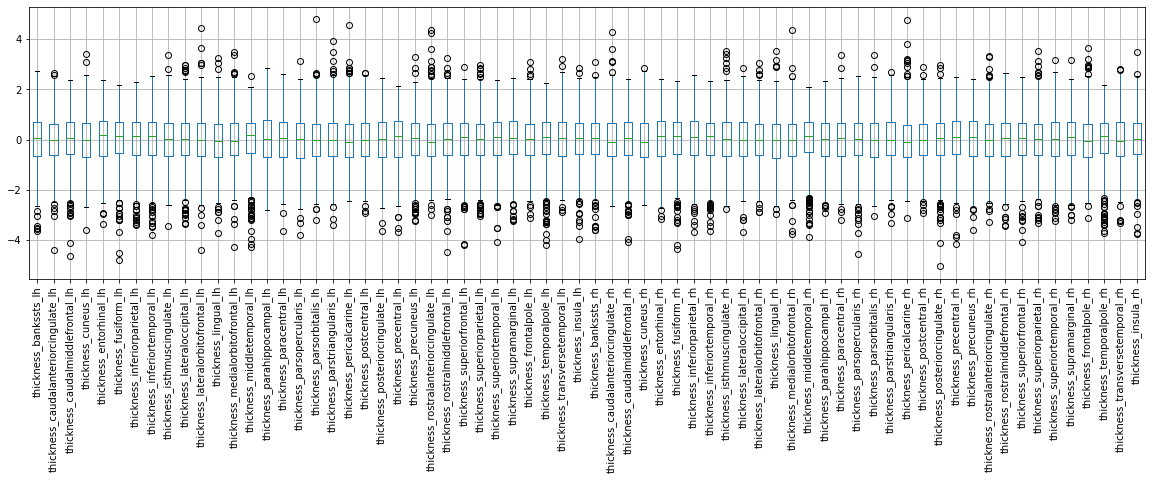

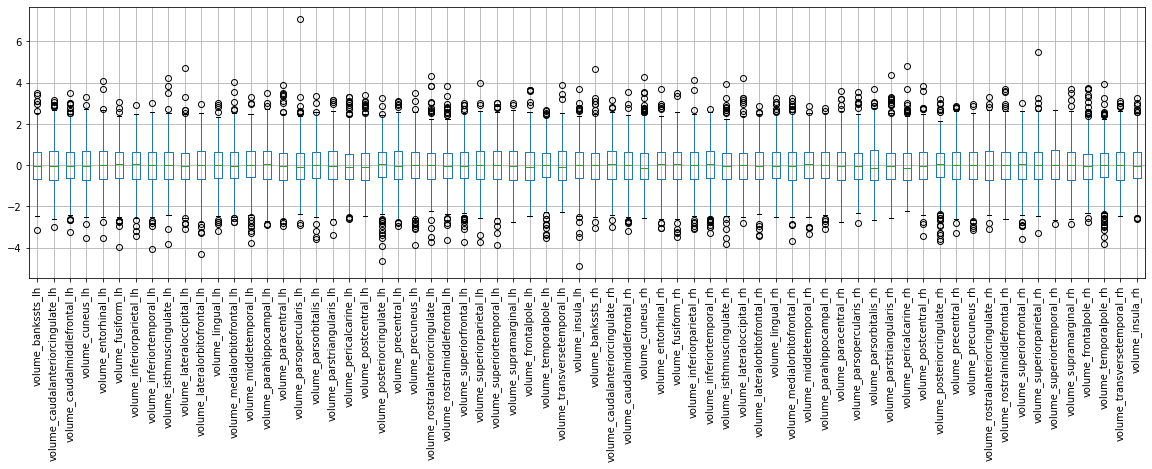

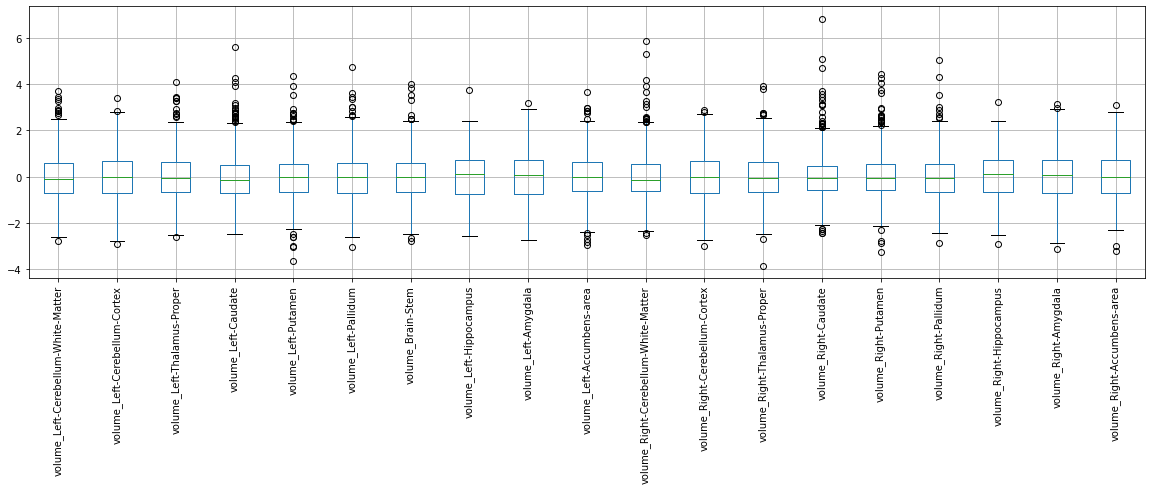

In [7]:
X_train_scaled = pd.read_csv('adni_train_scaled_corrected.csv', index_col=0)

for feats in [features_cort, features_vol, features_vol_extra]:
    tmp_df = X_train_scaled.loc[:, feats]
    
    plt.figure(figsize=(20, 5))
    tmp_df.boxplot(rot=90)

    plt.show()
    plt.close()